In [33]:
# Importing the necessary libraries:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Resizing all the images, because ResNet works with a specific size of images:
image_size = [224, 224]

train_path = 'Datasets/Train/'
valid_path = 'Datasets/Test/'

In [3]:
# Importing the ResNet 50 library and added pre-processing layer to the front of VGG:
resnet = ResNet50(input_shape=image_size + [3], weights='imagenet', include_top=False)

In [4]:
# Not training the existing weights:
for layer in resnet.layers:
    layer.trainable = False

In [5]:
# Getting number of output classes:
folders = glob('Datasets/Train/*')

In [6]:
folders

['Datasets/Train/mercedes',
 'Datasets/Train/audi',
 'Datasets/Train/lamborghini']

In [7]:
x = Flatten()(resnet.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# Creating model object:
model = Model(inputs = resnet.input, outputs=prediction)

In [9]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [10]:
# Optimizations for the model:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [11]:
# Use ImageDataGenerator to augment our datasets:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range=0.2, 
                                   zoom_range=0.2,
                                   horizontal_flip=True)
# No augmentation in test data:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
training_set = train_datagen.flow_from_directory('Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [13]:
test_set = test_datagen.flow_from_directory('Datasets/Test/',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [14]:
#Fitting the model:
r = model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=30,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
2/2 [==============================] - 10s 5s/step - loss: 4.7983 - accuracy: 0.3125 - val_loss: 17.1596 - val_accuracy: 0.3276
Epoch 2/30
2/2 [==============================] - 7s 4s/step - loss: 11.4420 - accuracy: 0.3906 - val_loss: 6.6688 - val_accuracy: 0.1724
Epoch 3/30
2/2 [==============================] - 7s 3s/step - loss: 3.4322 - accuracy: 0.3906 - val_loss: 3.8539 - val_accuracy: 0.5172
Epoch 4/30
2/2 [==============================] - 7s 3s/step - loss: 4.9887 - accuracy: 0.3281 - val_loss: 2.4856 - val_accuracy: 0.5172
Epoch 5/30
2/2 [==============================] - 10s 5s/step - loss: 2.3370 - accuracy: 0.3438 - val_loss: 3.4458 - val_accuracy: 0.3448
Epoch 6/30
2/2 [==============================] - 6s 3s/step - loss: 2.3659 - accuracy: 0.5156 - val_loss: 5.0010 - val_accuracy: 0.1552
Epoch 7/30
2/2 [==============================] - 10s 5s/step - loss: 2.5735 - accuracy: 0.5469 - 

### Visualizing losses:

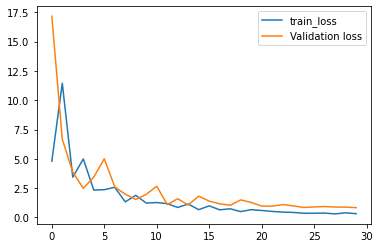

In [15]:
plt.plot(r.history['loss'], label='train_loss')
plt.plot(r.history['val_loss'], label='Validation loss')
plt.legend()

### Visualizing accuracies:

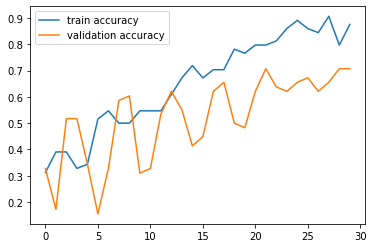

In [17]:
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='validation accuracy')
plt.legend()

### Saving our model as a h5 file:

In [18]:
from tensorflow.keras.models import load_model

model.save('model_ResNet50.h5')

### Making predictions:

In [19]:
pred = model.predict(test_set)

In [22]:
pred

array([[3.28666940e-02, 6.26494825e-01, 3.40638489e-01],
       [2.72542443e-02, 5.28354108e-01, 4.44391668e-01],
       [8.13858569e-01, 9.91855711e-02, 8.69558752e-02],
       [3.90961170e-02, 8.70315552e-01, 9.05883461e-02],
       [1.96623370e-01, 3.91541272e-01, 4.11835372e-01],
       [2.01135084e-01, 3.46350729e-01, 4.52514261e-01],
       [4.37188009e-03, 9.74148035e-01, 2.14800481e-02],
       [1.42607577e-02, 8.78007829e-01, 1.07731409e-01],
       [9.57767814e-02, 3.62022877e-01, 5.42200387e-01],
       [7.21891556e-05, 2.40778594e-04, 9.99687076e-01],
       [2.35885140e-02, 8.67838800e-01, 1.08572632e-01],
       [6.56575290e-03, 9.36268687e-01, 5.71654513e-02],
       [2.33050063e-02, 6.75200880e-01, 3.01494151e-01],
       [9.37700495e-02, 1.59156308e-01, 7.47073710e-01],
       [5.67537583e-02, 6.99908376e-01, 2.43337870e-01],
       [5.59021533e-01, 3.75574417e-02, 4.03421044e-01],
       [3.70346638e-03, 8.26682210e-01, 1.69614390e-01],
       [5.59136691e-03, 9.93243

In [23]:
# Making our predictions easier to understand:
pred = np.argmax(pred, axis=1)

In [24]:
pred

array([1, 1, 0, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 0, 1, 1, 2,
       1, 2, 0, 0, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 0, 2, 1, 1, 2,
       2, 2, 1, 1, 0, 1, 1, 2, 2, 1, 1, 2, 1, 1])

### Making real-time predictions:

In [25]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [26]:
model = load_model('model_ResNet50.h5')

In [42]:
# Reading our input image:
img = image.load_img('Datasets/Test/lamborghini/14.jpg', target_size=(224, 224))

In [43]:
x = image.img_to_array(img)

In [44]:
x

array([[[ 65.,  58.,  48.],
        [ 65.,  58.,  48.],
        [ 65.,  58.,  48.],
        ...,
        [194., 214., 202.],
        [158., 159., 143.],
        [132., 130., 115.]],

       [[ 65.,  58.,  48.],
        [ 65.,  58.,  48.],
        [ 66.,  59.,  49.],
        ...,
        [194., 214., 202.],
        [158., 159., 143.],
        [132., 130., 115.]],

       [[ 66.,  59.,  49.],
        [ 66.,  59.,  49.],
        [ 67.,  60.,  50.],
        ...,
        [193., 213., 201.],
        [158., 159., 143.],
        [132., 130., 115.]],

       ...,

       [[102.,  96.,  96.],
        [101.,  95.,  97.],
        [100.,  94.,  96.],
        ...,
        [112., 111., 106.],
        [123., 119., 110.],
        [127., 123., 114.]],

       [[112., 106., 106.],
        [112., 106., 108.],
        [115., 109., 111.],
        ...,
        [109., 108., 103.],
        [125., 121., 112.],
        [128., 124., 115.]],

       [[113., 107., 107.],
        [115., 109., 111.],
        [123., 1

In [45]:
# Confirming the shape:
x.shape

(224, 224, 3)

In [46]:
x = x/255 # Did this in accordance to test_datagen(cell 11)

In [47]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [48]:
model.predict(img_data)

array([[0.0055003 , 0.00911818, 0.9853815 ]], dtype=float32)

In [49]:
finalOutput = np.argmax(model.predict(img_data), axis=1)

In [50]:
finalOutput

array([2])

### Hence, it is successfully predicting that the input image is a Lamborghini.